# Real-time Simulation of the Ising Model

Author : Simon Williams, Institute of Particle Physics, University of Durham - [simon.j.williams@durham.ac.uk](mailto:simon.j.williams@durham.ac.uk)

## The Ising Model Hamiltonian

The lattice Ising model Hamiltonian describes a system of spins on a lattice, where each spin interacts with its neighbours and possibly an external magnetic field. The Ising model on a $d$-dimensional lattice has the form

$$
H = -\sum_{\langle i,j\rangle} J_{i,j}\,\sigma_i\sigma_j - \mu \sum_i h_i\,\sigma_i,\tag{1}
$$
where $J_{i,j}$ is the interaction strength between neighbouring spins $i$ and $j$, $\langle i,j\rangle$ denotes the sum over nearest-neighbour pairs of sites $i$ and $j$, $\sigma_i$ represents the spin at site $i$, where $\sigma_i=\pm 1$ (i.e. spin up or spin down in the classical Ising model), and $h$ is an external magnetic field applied uniformly across the lattice with magnetic moment $\mu$. If $J>0$ the interaction is *ferromagnetic* where neighbouring spins align; if $J<0$ the interaction is *antiferromagnetic* where neighbouring spins anti-align. 

The Hamiltonian can be split into two parts, $H = H_1 + H_2$, where

$$
H_1 = -\sum_{\langle i,j\rangle} J_{i,j}\,\sigma_i\sigma_j \tag{2}
$$
describes the spin-spin interactions between nearest-neighbours, and

$$
H_2 = - \mu \sum_i h_i\,\sigma_i,\tag{3}
$$
describes the interaction with an external field.

## Quantum Mechanical Ising Model

To express the Ising Hamiltonian using a quantum mechanical description of spins, we must now replace the classical spin variables $\sigma=\pm 1$ with the respective Pauli matrices. Making the assumption that the interactions between neighbouring sites is equal for every $i$ and $j$, and decomposing the magnetic field into transverse and longitudinal fields, the Hamiltonian becomes

$$
H = -J\sum_{\langle i, j\rangle} \sigma_i^z\sigma_j^z - h \sum_i \sigma^z_i - \Gamma \sum_i \sigma^x_i.\tag{4}
$$
where $h$ is now the longitudinal field (oriented along the $z$ direction) and $\Gamma$ is the transverse field (oriented along the $x$ direction).

If the value of the transverse-field strength, $\Gamma$, is zero, then the system is purely classical. Therefore, at low values of $\Gamma$ the system behaves similiarly to the classical Ising model: The spins will tend to (anti-)align in the $z$-direction depending on the value of $J$, forming (anti-)ferromagnetic states. If the value f $\Gamma$ is large, the transverse field dominates, and the spins are likely to be in a superposition of states due to the $\sigma^x$ in the transverse term. In the limit $J\ll h$, the spins will all align in the $x$-direction, leading to a highly-disordered phase. At the point where the interactions between neighbouring spins and the transverse field become comparable, $J\sim \Gamma$, the Ising model can experience a phase transition between the ordered and disordered regime. 


### Ising model in 1D:

In one-dimension, the Ising model describes a one-dimensional chain of $N$-spins,

$$
H = -J \sum^{N-1}_{i=1} \sigma_i^z\sigma_{i+1}^z - \Gamma \sum^N_{i=1} \sigma^x_i,\tag{5}
$$
where here we have taken the value of the the longitudinal field $h=0$. 

We will use the one-dimensional Ising spin model in our example below where we will simulate the real-time evolution of the model using Hamiltonian simulation.

## Hamiltonian Simulation - Real-time evolution of $H$

To simulate the real-time evolution of a quantum system, we use the Schrödinger time-evolution operator

$$
U(t) = e^{-iHt}.\tag{6}
$$
Using this method avoids costly sign-problems experienced by Monte-Carlo approaches to evolution of lattice modes in imaginary time. However, directly calculating the real-time evolution of a Hamiltonian is quickly unfeasible on a classical device, as the required resources grow exponentially with the number of lattice sites. Quantum computers have an exponentially growing Hilbert space, and therefore can feasibly simulate lattice models in real-time. 

In this example, we wish to consider the real-time evolution of the Ising model with a transverse-field in one dimenesion, as shown in Equation (5). However, we see that the two terms in the Hamiltonian do not commute due to the Pauli-operator commutation relations, $\left[\sigma_j, \sigma_k\right]=2i\,\varepsilon_{ijk}\sigma_l$. We must therefore construct an approximation of the full Hamiltonian where the terms can be separated. 

### Trotter-Suzuki Decomposition

Expressing the Hamiltonian as a sum of non-commuting parts $H=\sum_i H_i$ and using the Zassenhaus formula, it is possible to separate the non-commuting terms in $H$ by Trotter-Suzuki decomposition, such that the time-evolution operation from Equation (6) is approximated by

$$
\mathcal{U}(t) = \left[\prod_i e^{-iH_it/n}\right]^n,\tag{7}
$$
up to an error $\mathcal{O}(t^2/n)$, where $n$ is a positive integer. The operator $\mathcal{U}(t)$ defines the so-called *Trotterised time-evolution*, which divides the total evolution time, $t$, into $n$ steps of time $\delta t = t/n$. The total time evolution is then achieved by applying $n$ Trotter steps, such that the Trotterised time-evolution is exact in the limit $n\rightarrow \infty$.

A single Trotter step for the real-time evolution of the one-dimensional Ising model from Equation (5) is therefore

$$
e^{iJ\delta{t}\,\sigma_i^z\sigma_{i+1}^z}\,e^{i\Gamma\delta{t}\,\sigma_i^x}.\tag{8}
$$

## Hamiltonian Simulation on Quantum Computers

Now that the model has been constructed and Trotterised, we are ready to implement the real-time evolution on a quantum device. To do so, we must first define a mapping to qubits.

### Mapping to Qubits

In this example, we will us a qubit-based quantum computer to carry out the simulation. Qubits are the natural representation of spin-1/2 particles. The qubit is represented by the Bloch Sphere, as shown in Figure 1.

<p align="center">
<img src="../figures/blochSphere.png" width="400"/>
<em>Figure 1: The Bloch Sphere</em>
</p>

A suitable basis for qubits is constructed from the Pauli-operator basis, $(\sigma^0, \sigma^x, \sigma^y, \sigma^z)$. Exponentials of the Pauli-operators are rotations on the qubit, and can be visualised as rotations on the Bloch sphere around an axis. For example, the $R_z$ gate corresponds to a rotation about the $z$-axis and is described by 

$$
R_z\left(\frac{\theta}{2}\right) = e^{-i\theta\sigma_z}. \tag{9}
$$

### Circuit decomposition for the 1D Ising Model

Conveniently, the Ising model is already written in the Pauli basis, and the Trotter step from Equation (8) maps directly onto a qubit-based device. We will break this down into two steps:<br><br>

**Nearest Neighbour Interaction: $-J\sum_i\sigma_i^z\sigma_{i+1}^z$**<br><br>
The term describes the interaction between two qubits in the 1D chain and is described by the product of two Pauli-Z operators. This Pauli-ZZ operation, when exponentiated, corresponds to a *controlled-Z* operation (Please see the notes for a dicussion on gate decomposition). An entangling operation between the two qubits. This can be decomposed in a series of *CNOT* and R_z gates in the following way: 

<p align="center">
<img src="../figures/ZZgateFull.png" width="400"/>
<em>Figure 2: Pauli-ZZ gate</em>
</p>

Notice that the argument of the $R_z$ gate corresponds to the coefficient of the $\sigma^z_i\sigma^z_{i+1}$ term in the exponent. The opertation is a two-qubit operation, acting on qubits $i$ and $i+1$. 

**Transverse Field: $-\Gamma\sum_i\sigma^x_i$**

The transverse-field term corresponds to a single-qubit $R_x$ operation and is applied independently to each qubit. For each qubit, one applies the operation

$$
R_x(2\Gamma \, \delta t) = e^{-i\Gamma\,\delta t\, \sigma_x}.\tag{10}
$$
which can be expressed on a circuit as:

<p align="center">
<img src="../figures/Xgate.png" width="300"/>
<em>Figure 3: Pauli-X gate</em>
</p>

## Circuit decomposition for 1D Ising Hamiltonian on $n$ Lattice sites:

We are now interested in the circuit decomposition of the 1D Ising model with a transverse field for a specific number of Lattice sites. To begin we consider the $n=2$ case. Putting all the above together, the circuit becomes:

<p align="center">
<img src="../figures/TrotterStep.png" width="400"/>
<em>Figure 4: Trotter Step for n=2 sites</em>
</p>

Below we will now code this up using `PennyLane` and consider the time-evolution of the system.

# Lattice on a Quantum Computer

## 1D Ising Model with $n=2$ sites

We now wish to simulate the time-evolution of the model we have built above. To do so, we import all the necessary requirements

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pennylane as qml

To run a circuit on a quantum computer/simulator in `PennyLane` we must first device the device we will be using. For this exercise, we will use the `default.qubit` simulator, and we will use 2 qubits to begin with:

In [2]:
n_qubits = 2
dev      = qml.device('default.qubit', 
                      wires=n_qubits)

Next we want to build our circuit from Figure 4. To do so, we must decorate our quantum circuit with a QNode, `@qml.qnode(dev)`. A QNode is a quantum function that can be evaluated and differentiated. The QNode is therefore particularly useful when intergrating quantum computing in classical machine learning frameworks. Here, we will not consider the QNode further.

In [3]:
@qml.qnode(dev)
def circuit(J, G, dt, time):
    
    for i in range(int(time/dt)):
        qml.CNOT(wires=[0,1])
        qml.RZ(2*J*dt, wires=1)
        qml.CNOT(wires=[0,1])
        
        qml.RX(2*G*dt, wires=0)
        qml.RX(2*G*dt, wires=1)
    
    return [qml.expval(qml.PauliZ(0)),
            qml.expval(qml.PauliZ(1)),
            qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]

Here we see that the function we have defined follows the circuit diagram from Figure 4, applying the Trotter step $N$ times to approximate the time-evolution. We also return some measurements corresponding to the following values:

$$
\langle \sigma_i^z \rangle,\quad \langle \sigma_1^z\sigma_2^z \rangle.\tag{11}
$$

We can now run the circuit to simulate the time-evolution of the system for different nearest-neighbour couplings, J, and a transverse-field coupling, $\Gamma$. We will use the measurements to study the time-evolution of the two-point correlation function

$$
C_{zz} = \langle \sigma_1^z\sigma_2^z \rangle, \tag{12}
$$

and the total magnetisation along the $z$-axis

$$
M_z = \frac{1}{2}\left(\langle \sigma_1^z \rangle +  \langle \sigma_2^z \rangle\right). \tag{13}
$$

In [4]:
### Define evolution time 
total_time = 3
dt         = 0.01
current_t  = 0

### Define couplings
J          = 1.0
G          = 1.0 

### Initialise lists to store evolution
Z1, Z2         = [], []
ZZcorrel, magZ = [], []

### Loop over Trotter steps
for i in range(int(total_time/dt)+1):
    trotter  = circuit(J, G, dt, current_t)
    Z1.append(trotter[0].numpy())
    Z2.append(trotter[1].numpy())
    ZZcorrel.append(trotter[2].numpy())
    magZ.append(0.5*(trotter[0].numpy() + trotter[1].numpy()))
    del(trotter)
    ### Increase time by dt for next iteration
    current_t = current_t + dt

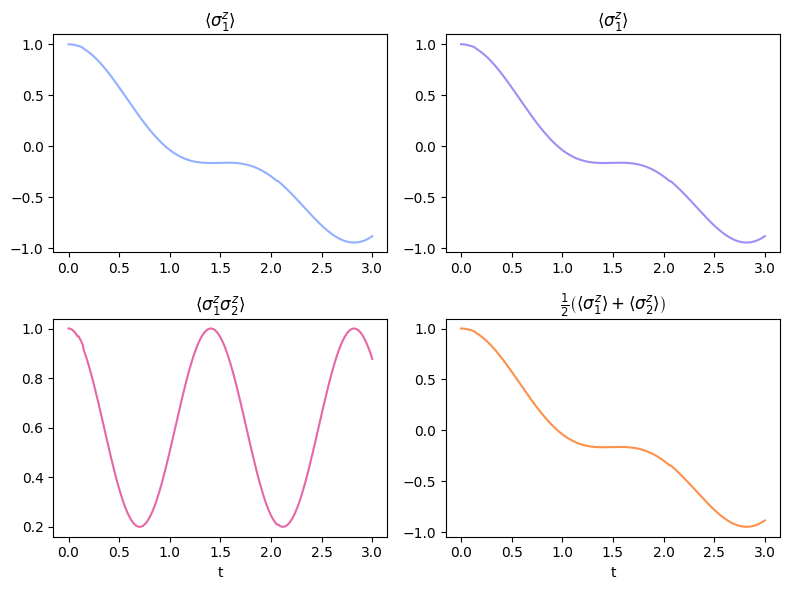

In [5]:
my_colormap = ['#648fff', '#785ef0', '#dc267f', '#fe6100']
x           = np.arange(0, 3.+dt, dt)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

### Plotting <\sigma_1^z>
axs[0, 0].plot(x, Z1, color=my_colormap[0], alpha=0.7)
axs[0, 0].set_title(r'$\langle \sigma_1^z \rangle$')

### Plotting <\sigma_2^z>
axs[0, 1].plot(x, Z2, color=my_colormap[1], alpha=0.7)
axs[0, 1].set_title(r'$\langle \sigma_1^z \rangle$')

### Plotting <\sigma_1^z \sigma_2^z>
axs[1, 0].plot(x, ZZcorrel, color=my_colormap[2], alpha=0.7)
axs[1, 0].set_title(r'$\langle \sigma_1^z \sigma_2^z \rangle$')
axs[1, 0].set_xlabel('t')

### Plotting 1/2(<\sigma_1^z>+<\sigma_2^z>)
axs[1, 1].plot(x, magZ, color=my_colormap[3], alpha=0.7)
axs[1, 1].set_title(r'$\frac{1}{2}\left(\langle \sigma_1^z \rangle +  \langle \sigma_2^z \rangle\right)$')
axs[1, 1].set_xlabel('t')

# Adjust spacing
plt.tight_layout()
plt.show()

We see that the spins remain in aligned throughout the time-evolution, despite $J\sim\Gamma$. This is a consequence of the small system size of $n=2$. While a two-site model can illustrate basic principles of the Ising model and quantum mechanics, it cannot capture the emergent phenomena associated with phase transitions. This is the case for several reasons, including:

+ **Thermodynamic limit**: The system does not have a thermodynamic limit (i.e. $n\rightarrow \infty$). In a finite system, all thermodynamic quantities are smooth functions of the system parameters. Therefore, the system does not exhibit discontinuous changes, indicative of a phase shift. 

+ **Emergence of Long-Range Correlations**: In larger systems, spins separated by large distances can become correlated near the critical point, leading to collective behavior. For a two-site system, the maximum separation is between the two sites themselves, so you cannot observe how correlations decay with distance or how an ordered phase emerges.

A two-site Ising model is therefore inherently too small to exhibit phase transitions because it lacks the extensive degrees of freedom and the ability to develop long-range order, both of which are essential for such phenomena. Phase transitions are collective effects that emerge only in systems with a large number of interacting components.

## 1D Ising Model with $n=4$ sites

Increasing the number of sites allows for us to examine more interesting physics that wasn't captured by the $n=2$ case, such as a phase transition. Here we consider a system with $n=4$ sites, and therefore $n_q =4$ qubits in the simulation. 

Increasing the size of the system means we now need to start considering boundary conditions. Below we consider two options: open-boundary conditions (OBC) and periodic-boundary conditions (PBC). 

### Open-Boundary Conditions:

Let us first consider OBC. This is the easiest extension of our $n=2$ model from above, with the Hamiltonian taking the form:

$$
H_{OBC} = - J \sum^{n-1}_{i=1} \sigma_i^z\sigma_{i+1}^z - \Gamma \sum_{i=1}^n \sigma_i^x. \tag{14}
$$
Therefore, for $n=4$ sites, we have

$$
H_{OBC} = - J \left[ \sigma_1^z\sigma_2^z + \sigma_2^z\sigma_3^z + \sigma_3^z\sigma_4^z\right] - \Gamma \left[ \sigma_1^x + \sigma_2^x+ \sigma_3^x+ \sigma_4^x\right]. \tag{15}
$$

The total magnetisation along the $z$-axis is now given by

$$
M_z = \frac{1}{n} \sum_i\left\langle \sigma_i^z\right\rangle.\tag{16}
$$

We can implement this Hamiltonian on the quantum computer in the same way as before:

In [6]:
n_qubits = 4
dev      = qml.device('default.qubit', 
                      wires=n_qubits)

In [7]:
@qml.qnode(dev)
def circuit(J, G, dt, time, n_modes):
    
    for i in range(int(time/dt)):
        for i in range(n_modes-1):
            qml.CNOT(wires=[i,i+1])
            qml.RZ(2*J*dt, wires=(i+1))
            qml.CNOT(wires=[i,i+1])
            
        for i in range(n_modes):
            qml.RX(2*G*dt, wires=i)
    
    return [qml.expval(qml.PauliZ(0)),
            qml.expval(qml.PauliZ(1)),
            qml.expval(qml.PauliZ(2)),
            qml.expval(qml.PauliZ(3)),
            qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]

In [8]:
### Define evolution time 
total_time = 3
dt         = 0.01
current_t  = 0

### Define couplings
J          = 1.0
G          = 1.0 

### Initialise lists to store evolution
Z1, Z2, Z3, Z4 = [], [], [], []
ZZcorrel, magZ = [], []

### Loop over Trotter steps
for i in range(int(total_time/dt)+1):
    trotter  = circuit(J, G, dt, current_t, n_qubits)
    Z1.append(trotter[0].numpy())
    Z2.append(trotter[1].numpy())
    Z3.append(trotter[2].numpy())
    Z4.append(trotter[3].numpy())
    ZZcorrel.append(trotter[-1].numpy())
    magZ.append(0.25*(trotter[0].numpy() + trotter[1].numpy() + trotter[2].numpy() + trotter[3].numpy()))
    del(trotter)
    ### Increase time by dt for next iteration
    current_t = current_t + dt

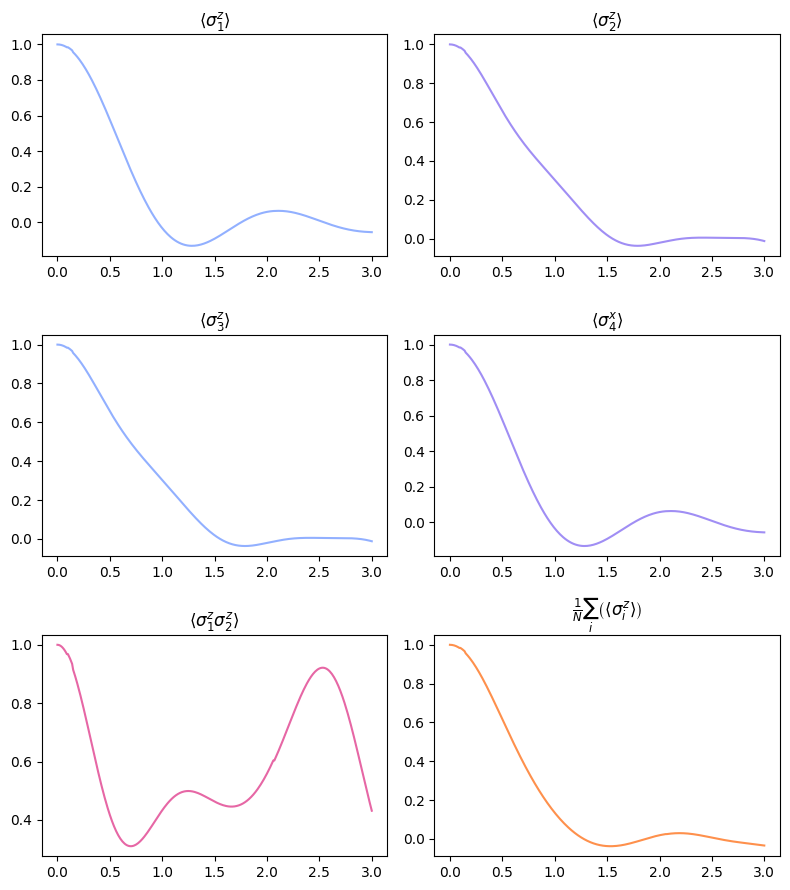

In [9]:
my_colormap = ['#648fff', '#785ef0', '#dc267f', '#fe6100']
x           = np.arange(0, 3.+dt, dt)

fig, axs = plt.subplots(3, 2, figsize=(8, 9))

### Plotting <\sigma_1^z>
axs[0, 0].plot(x, Z1, color=my_colormap[0], alpha=0.7)
axs[0, 0].set_title(r'$\langle \sigma_1^z \rangle$')

### Plotting <\sigma_2^z>
axs[0, 1].plot(x, Z2, color=my_colormap[1], alpha=0.7)
axs[0, 1].set_title(r'$\langle \sigma_2^z \rangle$')

### Plotting <\sigma_3^z>
axs[1, 0].plot(x, Z3, color=my_colormap[0], alpha=0.7)
axs[1, 0].set_title(r'$\langle \sigma_3^z \rangle$')

### Plotting <\sigma_4^z>
axs[1, 1].plot(x, Z4, color=my_colormap[1], alpha=0.7)
axs[1, 1].set_title(r'$\langle \sigma_4^x \rangle$')

### Plotting <\sigma_1^z \sigma_2^z>
axs[2, 0].plot(x, ZZcorrel, color=my_colormap[2], alpha=0.7)
axs[2, 0].set_title(r'$\langle \sigma_1^z \sigma_2^z \rangle$')

### Plotting 1/2(<\sigma_1^z>+<\sigma_2^z>)
axs[2, 1].plot(x, magZ, color=my_colormap[3], alpha=0.7)
axs[2, 1].set_title(r'$\frac{1}{N}\sum_i\left(\langle \sigma_i^z \rangle \right)$')

# Adjust spacing
plt.tight_layout()
plt.show()

Here we start to see some of the spins go out of alignment, as expected from the couplings $J=\Gamma=1$. The system size is still too small to see a phase transition, but we can see the indication that this will happen as we increase $n$.

### Periodic-Boundary Conditions

We now consider PBC, i.e. a lattice on a circle. The Hamiltonian takes the form

$$
H_{PBC} = - J \sum^{n}_{i=1} \sigma_i^z\sigma_{\overline{i+1}}^z - \Gamma \sum_{i=1}^n \sigma_i^x. \tag{17}
$$
where $\overline{i+1}$ means $n+1=1$, and thus the system is periodic. For the $n=4$ qubit case, the Hamiltonian takes the form

$$
H_{OBC} = - J \left[ \sigma_1^z\sigma_2^z + \sigma_2^z\sigma_3^z + \sigma_3^z\sigma_4^z + \sigma_4^z\sigma_1^z\right] - \Gamma \left[ \sigma_1^x + \sigma_2^x+ \sigma_3^x+ \sigma_4^x\right]. \tag{18}
$$

We once again simulate this in the same way but by altering the circuit slightly:

In [10]:
@qml.qnode(dev)
def circuit(J, G, dt, time, n_modes):
    
    for i in range(int(time/dt)):
        for i in range(n_modes-1):
            qml.CNOT(wires=[i,i+1])
            qml.RZ(2*J*dt, wires=(i+1))
            qml.CNOT(wires=[i,i+1])
            
        qml.CNOT(wires=[n_modes-1,0])
        qml.RZ(2*J*dt, wires=(0))
        qml.CNOT(wires=[n_modes-1,0])
            
        for i in range(n_modes):
            qml.RX(2*G*dt, wires=i)
    
    return [qml.expval(qml.PauliZ(0)),
            qml.expval(qml.PauliZ(1)),
            qml.expval(qml.PauliZ(2)),
            qml.expval(qml.PauliZ(3)),
            qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]

In [11]:
### Define evolution time 
total_time = 3
dt         = 0.01
current_t  = 0

### Define couplings
J          = 1.0
G          = 1.0 

### Initialise lists to store evolution
Z1, Z2, Z3, Z4 = [], [], [], []
ZZcorrel, magZ = [], []

### Loop over Trotter steps
for i in range(int(total_time/dt)+1):
    trotter  = circuit(J, G, dt, current_t, n_qubits)
    Z1.append(trotter[0].numpy())
    Z2.append(trotter[1].numpy())
    Z3.append(trotter[2].numpy())
    Z4.append(trotter[3].numpy())
    ZZcorrel.append(trotter[-1].numpy())
    magZ.append(0.25*(trotter[0].numpy() + trotter[1].numpy() + trotter[2].numpy() + trotter[3].numpy()))
    del(trotter)
    ### Increase time by dt for next iteration
    current_t = current_t + dt

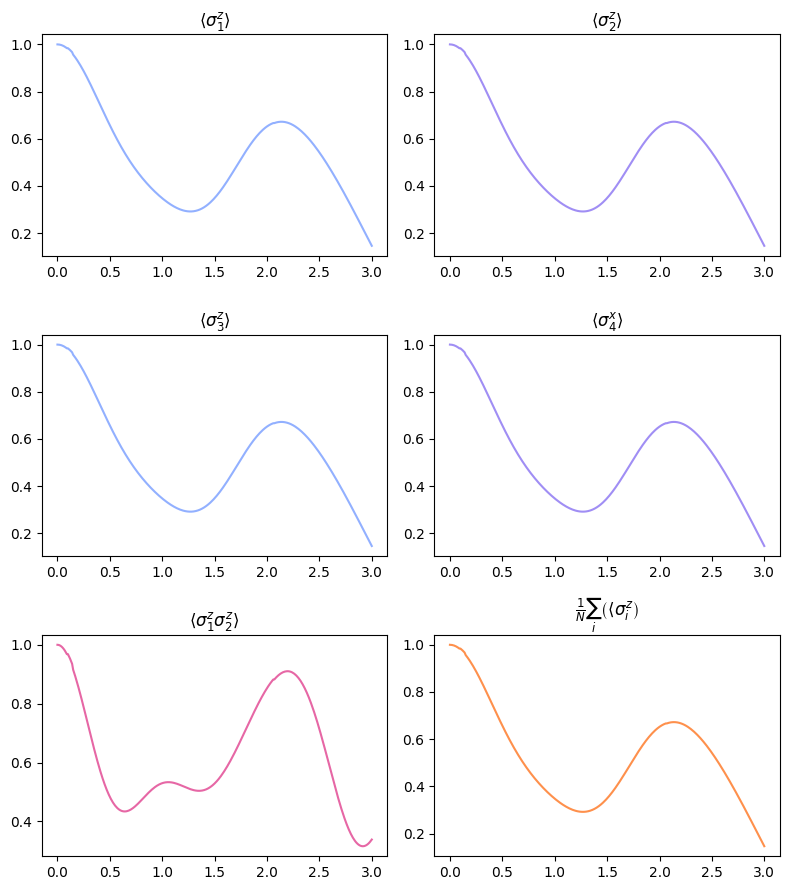

In [12]:
my_colormap = ['#648fff', '#785ef0', '#dc267f', '#fe6100']
x           = np.arange(0, 3.+dt, dt)

fig, axs = plt.subplots(3, 2, figsize=(8, 9))

### Plotting <\sigma_1^z>
axs[0, 0].plot(x, Z1, color=my_colormap[0], alpha=0.7)
axs[0, 0].set_title(r'$\langle \sigma_1^z \rangle$')

### Plotting <\sigma_2^z>
axs[0, 1].plot(x, Z2, color=my_colormap[1], alpha=0.7)
axs[0, 1].set_title(r'$\langle \sigma_2^z \rangle$')

### Plotting <\sigma_3^z>
axs[1, 0].plot(x, Z3, color=my_colormap[0], alpha=0.7)
axs[1, 0].set_title(r'$\langle \sigma_3^z \rangle$')

### Plotting <\sigma_4^z>
axs[1, 1].plot(x, Z4, color=my_colormap[1], alpha=0.7)
axs[1, 1].set_title(r'$\langle \sigma_4^x \rangle$')

### Plotting <\sigma_1^z \sigma_2^z>
axs[2, 0].plot(x, ZZcorrel, color=my_colormap[2], alpha=0.7)
axs[2, 0].set_title(r'$\langle \sigma_1^z \sigma_2^z \rangle$')

### Plotting 1/2(<\sigma_1^z>+<\sigma_2^z>)
axs[2, 1].plot(x, magZ, color=my_colormap[3], alpha=0.7)
axs[2, 1].set_title(r'$\frac{1}{N}\sum_i\left(\langle \sigma_i^z\right)$')

# Adjust spacing
plt.tight_layout()
plt.show()

We see that the boundary conditions have a large effect on the model for small lattices. The presence of a potential phase transition is not visible in the PBC case. 

## Extra tasks:

### Can you calculate the energy of the system?

Let us try this for the 2 qubit case. It is extendable beyond that:

In [13]:
J    = 1.0
G    = 1.0
dt   = 0.01
time = 1

n_qubits = 2
dev      = qml.device('default.qubit', 
                      wires=n_qubits)

@qml.qnode(dev)
def circuit(J, G, dt, time):
    
    for i in range(int(time/dt)):
        qml.CNOT(wires=[0,1])
        qml.RZ(2*J*dt, wires=1)
        qml.CNOT(wires=[0,1])
        
        qml.RX(2*G*dt, wires=0)
        qml.RX(2*G*dt, wires=1)
    
    return [qml.expval(qml.PauliX(0)),
            qml.expval(qml.PauliX(1)),
            qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]

In [14]:
expX1, expX2, cZZ = circuit(J, G, dt, time)

In [15]:
energy = -J * cZZ - G * (expX1 + expX2)
print(energy)

-1.0085883184827233


Now let us consider the time evolution of the energy:

In [16]:
### Define evolution time 
total_time = 3
dt         = 0.01
current_t  = 0

### Define couplings
J          = 1.0
G          = 1.0 

### Initialise lists to store evolution
energy = []

### Loop over Trotter steps
for i in range(int(total_time/dt)+1):
    expX1, expX2, cZZ  = circuit(J, G, dt, current_t)
    energy.append(-J * cZZ - G * (expX1 + expX2))
    ### Increase time by dt for next iteration
    current_t = current_t + dt

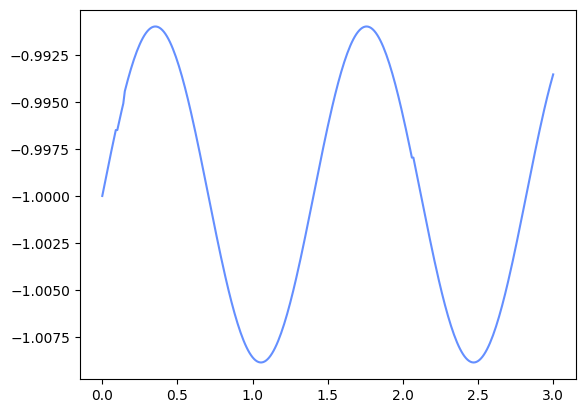

In [17]:
my_colormap = ['#648fff', '#785ef0', '#dc267f', '#fe6100']
x           = np.arange(0, 3.+dt, dt)
plt.plot(x, energy, color=my_colormap[0])
plt.show()

Now, let us try the OBC $n=4$ site lattice:

In [18]:
J    = 1.0
G    = 1.0
dt   = 0.01
time = 1

n_qubits = 4
dev      = qml.device('default.qubit', 
                      wires=n_qubits)

@qml.qnode(dev)
def circuit(J, G, dt, time, n_modes):
    
    for i in range(int(time/dt)):
        for i in range(n_modes-1):
            qml.CNOT(wires=[i,i+1])
            qml.RZ(2*J*dt, wires=(i+1))
            qml.CNOT(wires=[i,i+1])
            
        for i in range(n_modes):
            qml.RX(2*G*dt, wires=i)
    
    expZs = [qml.expval(qml.PauliZ(i) @ qml.PauliZ(i+1)) for i in range(n_modes-1)]
    expXs = [qml.expval(qml.PauliX(i)) for i in range(n_modes)]
    
    #expectation_values = [qml.expval(qml.PauliZ(i) @ qml.PauliZ(i + 1)) for i in range(n_modes - 1)] + [qml.expval(qml.PauliX(j)) for j in range(n_modes)]

    return expZs+expXs

In [19]:
### Define evolution time 
total_time = 3
dt         = 0.01
current_t  = 0

### Define couplings
J          = 1.0
G          = 1.0 

### Initialise lists to store evolution
energy = []

### Loop over Trotter steps
for i in range(int(total_time/dt)+1):
    exps = circuit(J, G, dt, current_t, n_modes=4)
    expH  = - J * (sum(exps[:3])) - G * (sum(exps[3:]))
    energy.append(expH)
    ### Increase time by dt for next iteration
    current_t = current_t + dt

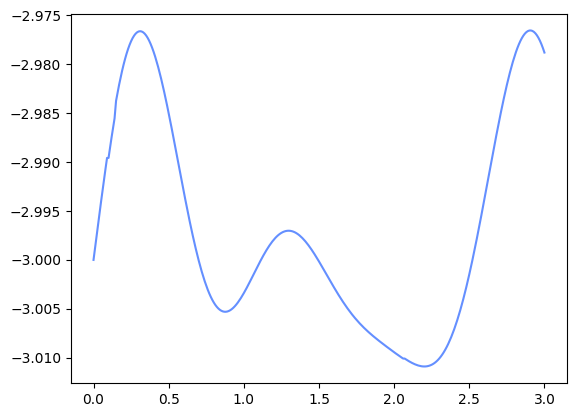

In [20]:
my_colormap = ['#648fff', '#785ef0', '#dc267f', '#fe6100']
x           = np.arange(0, 3.+dt, dt)
plt.plot(x, energy, color=my_colormap[0])
plt.show()

### What happens as you vary $J$ and $\Gamma$? 

In [21]:
n_qubits = 2
dev      = qml.device('default.qubit', 
                      wires=n_qubits)

@qml.qnode(dev)
def circuit(J, G, dt, time):
    
    for i in range(int(time/dt)):
        qml.CNOT(wires=[0,1])
        qml.RZ(2*J*dt, wires=1)
        qml.CNOT(wires=[0,1])
        
        qml.RX(2*G*dt, wires=0)
        qml.RX(2*G*dt, wires=1)
    
    return [qml.expval(qml.PauliZ(0))]#,
            #qml.expval(qml.PauliZ(1)),
            #qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]

In [22]:
J  = np.arange(0, 1, 0.01)
G  = np.arange(0, 1, 0.01)
dt = 0.01
t  = 1

ps = np.zeros((len(J), len(G)))
for i in range(len(J)):
    for j in range(len(G)):
        ps[i][j] = circuit(J[i], G[j], dt, t)[0]  

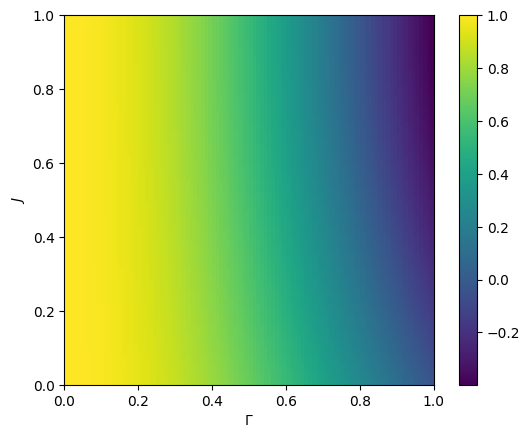

In [23]:
plt.imshow(ps, extent=(0, 1, 0, 1))
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$J$')
plt.colorbar()

### What is the effect of increasing the lattice? (Be aware, increasing the number of qubits too far in the simulation can be extremely computationally heavy!)

Simulation of a $n=8$ site lattice with OBC.

In [24]:
n_qubits = 8
dev      = qml.device('default.qubit', 
                      wires=n_qubits)

@qml.qnode(dev)
def circuit(J, G, dt, time, n_modes):
    
    for i in range(int(time/dt)):
        for i in range(n_modes-1):
            qml.CNOT(wires=[i,i+1])
            qml.RZ(2*J*dt, wires=(i+1))
            qml.CNOT(wires=[i,i+1])
            
        for i in range(n_modes):
            qml.RX(2*G*dt, wires=i)
    
    return [qml.expval(qml.PauliZ(0)),
            qml.expval(qml.PauliZ(1)),
            qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]

In [25]:
### Define evolution time 
total_time = 3
dt         = 0.01
current_t  = 0

### Define couplings
J          = 1.0
G          = 1.0 

### Initialise lists to store evolution
Z1, Z2   = [], []
ZZcorrel = []

### Loop over Trotter steps
for i in range(int(total_time/dt)+1):
    trotter  = circuit(J, G, dt, current_t, n_qubits)
    Z1.append(trotter[0].numpy())
    Z2.append(trotter[1].numpy())
    ZZcorrel.append(trotter[-1].numpy())
    del(trotter)
    ### Increase time by dt for next iteration
    current_t = current_t + dt

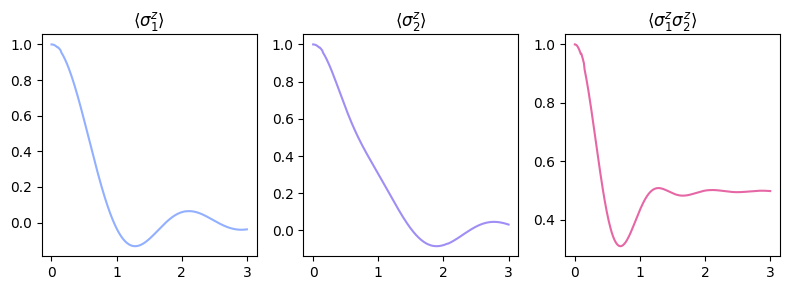

In [26]:
my_colormap = ['#648fff', '#785ef0', '#dc267f', '#fe6100']
x           = np.arange(0, 3.+dt, dt)

fig, axs = plt.subplots(1, 3, figsize=(8, 3))

### Plotting <\sigma_1^z>
axs[0].plot(x, Z1, color=my_colormap[0], alpha=0.7)
axs[0].set_title(r'$\langle \sigma_1^z \rangle$')

### Plotting <\sigma_2^z>
axs[1].plot(x, Z2, color=my_colormap[1], alpha=0.7)
axs[1].set_title(r'$\langle \sigma_2^z \rangle$')

### Plotting <\sigma_1^z \sigma_2^z>
axs[2].plot(x, ZZcorrel, color=my_colormap[2], alpha=0.7)
axs[2].set_title(r'$\langle \sigma_1^z \sigma_2^z \rangle$')

# Adjust spacing
plt.tight_layout()
plt.show()

### Does the initial state of the system have a large effect on the physics?

In [27]:
n_qubits = 2
dev      = qml.device('default.qubit', 
                      wires=n_qubits)

@qml.qnode(dev)
def circuit(J, G, dt, time, n_modes):
    
    qml.X(wires=[0])
    
    for i in range(int(time/dt)):
        for i in range(n_modes-1):
            qml.CNOT(wires=[i,i+1])
            qml.RZ(2*J*dt, wires=(i+1))
            qml.CNOT(wires=[i,i+1])
            
        for i in range(n_modes):
            qml.RX(2*G*dt, wires=i)
    
    return [qml.expval(qml.PauliZ(0)),
            qml.expval(qml.PauliZ(1)),
            qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]

In [28]:
### Define evolution time 
total_time = 3
dt         = 0.01
current_t  = 0

### Define couplings
J          = 1.0
G          = 1.0 

### Initialise lists to store evolution
Z1, Z2         = [], []
ZZcorrel, magZ = [], []

### Loop over Trotter steps
for i in range(int(total_time/dt)+1):
    trotter  = circuit(J, G, dt, current_t, n_qubits)
    Z1.append(trotter[0].numpy())
    Z2.append(trotter[1].numpy())
    ZZcorrel.append(trotter[2].numpy())
    magZ.append(0.5*(trotter[0].numpy() + trotter[1].numpy()))
    del(trotter)
    ### Increase time by dt for next iteration
    current_t = current_t + dt

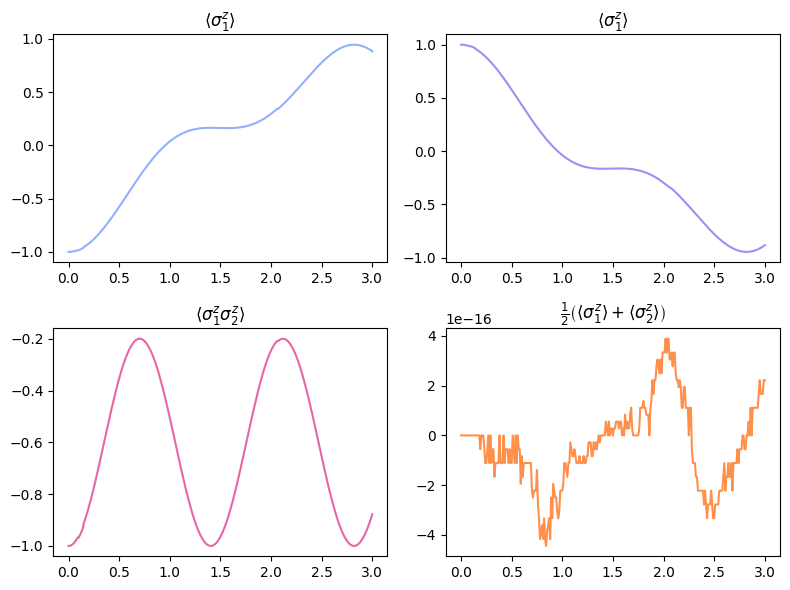

In [29]:
my_colormap = ['#648fff', '#785ef0', '#dc267f', '#fe6100']
x           = np.arange(0, 3.+dt, dt)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

### Plotting <\sigma_1^z>
axs[0, 0].plot(x, Z1, color=my_colormap[0], alpha=0.7)
axs[0, 0].set_title(r'$\langle \sigma_1^z \rangle$')

### Plotting <\sigma_2^z>
axs[0, 1].plot(x, Z2, color=my_colormap[1], alpha=0.7)
axs[0, 1].set_title(r'$\langle \sigma_1^z \rangle$')

### Plotting <\sigma_1^z \sigma_2^z>
axs[1, 0].plot(x, ZZcorrel, color=my_colormap[2], alpha=0.7)
axs[1, 0].set_title(r'$\langle \sigma_1^z \sigma_2^z \rangle$')

### Plotting 1/2(<\sigma_1^z>+<\sigma_2^z>)
axs[1, 1].plot(x, magZ, color=my_colormap[3], alpha=0.7)
axs[1, 1].set_title(r'$\frac{1}{2}\left(\langle \sigma_1^z \rangle +  \langle \sigma_2^z \rangle\right)$')

# Adjust spacing
plt.tight_layout()
plt.show()

### Can you extract other observables from the system? For example, how would you extract the expectation value $\langle \sigma^x_i \rangle$, or the two-point correlation function $C_{xx} = \langle \sigma^x_i \sigma^x_{i+1} \rangle$.

In [30]:
n_qubits = 2
dev      = qml.device('default.qubit', 
                      wires=n_qubits)

@qml.qnode(dev)
def circuit(J, G, dt, time, n_modes):
    
    for i in range(int(time/dt)):
        for i in range(n_modes-1):
            qml.CNOT(wires=[i,i+1])
            qml.RZ(2*J*dt, wires=(i+1))
            qml.CNOT(wires=[i,i+1])
            
        for i in range(n_modes):
            qml.RX(2*G*dt, wires=i)
    
    return [qml.expval(qml.PauliX(0)),
            qml.expval(qml.PauliX(1)),
            qml.expval(qml.PauliX(0) @ qml.PauliX(1))]

In [31]:
### Define evolution time 
total_time = 3
dt         = 0.01
current_t  = 0

### Define couplings
J          = 1.0
G          = 1.0 

### Initialise lists to store evolution
Z1, Z2         = [], []
ZZcorrel, magZ = [], []

### Loop over Trotter steps
for i in range(int(total_time/dt)+1):
    trotter  = circuit(J, G, dt, current_t, n_qubits)
    Z1.append(trotter[0].numpy())
    Z2.append(trotter[1].numpy())
    ZZcorrel.append(trotter[2].numpy())
    magZ.append(0.5*(trotter[0].numpy() + trotter[1].numpy()))
    del(trotter)
    ### Increase time by dt for next iteration
    current_t = current_t + dt

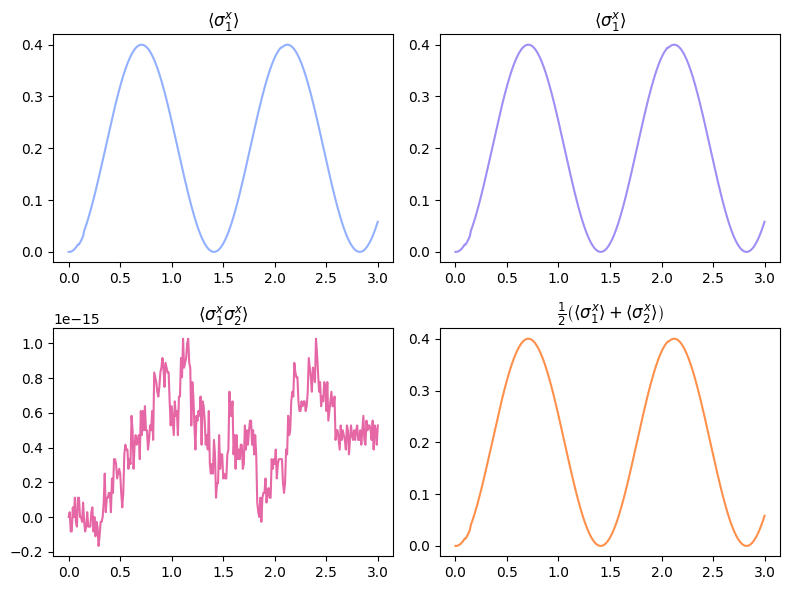

In [32]:
my_colormap = ['#648fff', '#785ef0', '#dc267f', '#fe6100']
x           = np.arange(0, 3.+dt, dt)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

### Plotting <\sigma_1^z>
axs[0, 0].plot(x, Z1, color=my_colormap[0], alpha=0.7)
axs[0, 0].set_title(r'$\langle \sigma_1^x \rangle$')

### Plotting <\sigma_2^z>
axs[0, 1].plot(x, Z2, color=my_colormap[1], alpha=0.7)
axs[0, 1].set_title(r'$\langle \sigma_1^x \rangle$')

### Plotting <\sigma_1^z \sigma_2^z>
axs[1, 0].plot(x, ZZcorrel, color=my_colormap[2], alpha=0.7)
axs[1, 0].set_title(r'$\langle \sigma_1^x \sigma_2^x \rangle$')

### Plotting 1/2(<\sigma_1^z>+<\sigma_2^z>)
axs[1, 1].plot(x, magZ, color=my_colormap[3], alpha=0.7)
axs[1, 1].set_title(r'$\frac{1}{2}\left(\langle \sigma_1^x \rangle +  \langle \sigma_2^x \rangle\right)$')

# Adjust spacing
plt.tight_layout()
plt.show()